In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
file = './new-york-city-airbnb-open-data/AB_NYC_2019.csv'

In [3]:
airbnb = pd.read_csv(file)

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# DATA CLEANING AND PREPARATION

In [5]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#airbnb.count()

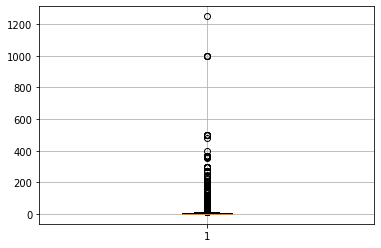

In [7]:
# I have noticed that the minimum nights max is 1250 which is not normal compare to the the other quartile so i am doing a 
# a box plot to check for outliers
plt.boxplot(airbnb['minimum_nights'])
plt.grid()
plt.show()

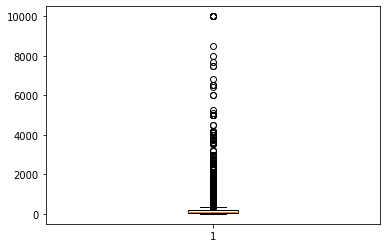

In [8]:
# make a plotbox to check for outliers
plt.boxplot(airbnb['price'])
plt.show()

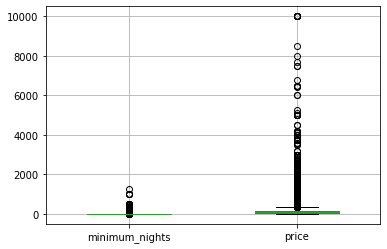

In [83]:
airbnb.boxplot(column=["minimum_nights", "price"],widths= 0.5)
plt.savefig('outliers.png')


In [11]:
# to see columns 
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# handling missing value or null
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [13]:
# plot to see missing values in a chart 
total = airbnb.isnull().sum().sort_values(ascending=False)
# get the percentage of missing values to plot
percent =(airbnb.isnull().sum() / airbnb.isnull().count()).sort_values(ascending=False)
#print(percent)
total_count = total.iloc[0:4]
print(total_count)


reviews_per_month    10052
last_review          10052
host_name               21
name                    16
dtype: int64


In [14]:
#airbnb.isnull().sum()

In [15]:
# replace null value by 0 

In [62]:
fill_airbnb = airbnb.fillna(0)
#fill_airbnb.head()

In [17]:
#fill_airbnb.isnull().sum()
# now we have all values with NAN replaced by 0 I will delete sum uneccessary column

In [18]:
# drop any duplicates
data = fill_airbnb.drop_duplicates()


In [19]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [20]:
to_drop = ['id', 'host_id']
data.drop(to_drop, inplace=True, axis=1)

In [21]:
data.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [22]:
#data.dtypes

In [23]:
# i would to know the unique neighborhood we have here 
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
# after the i found out that we dealing with 5 major neighborhood in new_york city, out of 99 cities in new york
# we dealing with the 5 popular cites

In [25]:
# i will filter the data so i can hva the place where have that highest price
df_subset = data.loc[(data['price'] > 5000) & (data['minimum_nights'] > 10) , ['neighbourhood_group','minimum_nights', 'price'] ]
df_subset
#grp = df_subset.groupby(['neighbourhood_group', 'price'])
#grp.count()

,neighbourhood_group,minimum_nights,price
3537,Manhattan,14,6000
9151,Queens,100,10000
12342,Manhattan,99,9999
29238,Manhattan,30,10000
30268,Manhattan,30,8500
37194,Manhattan,30,6500
40433,Manhattan,30,9999
43009,Manhattan,30,5100
48043,Manhattan,180,6500


In [26]:
# get the summary of data by neighbourhood_group
grp = data.groupby(['neighbourhood_group'])
grp.describe()['price']


,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [27]:
# this line of code tell us the type of room we dealing with
# so we dealing with Private roo,, entire home/app and shared room
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# EXPLORATORY ANALYSIS

In [28]:
data['neighbourhood'].nunique()

221

In [93]:
# first I will find the mean price per location
mean_price = data.groupby(['neighbourhood_group'])
price = mean_price.mean()['price']
df = pd.DataFrame(price)
df['neighbourhood_group'] = df.index

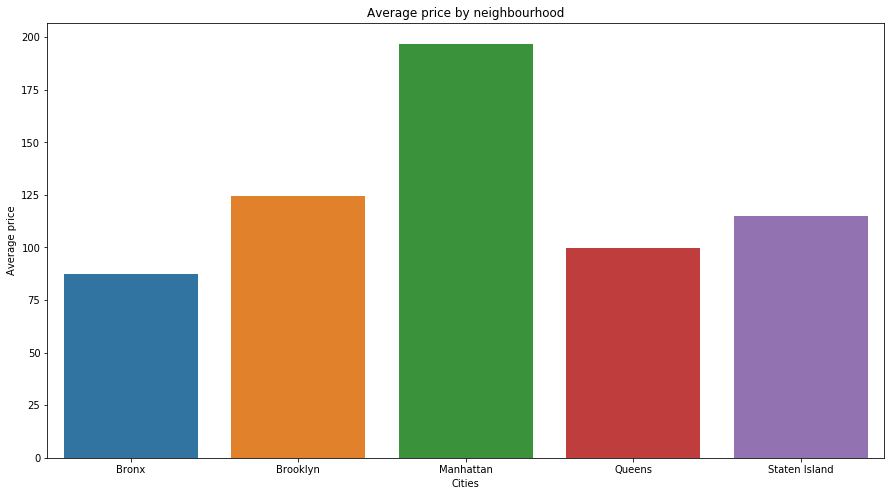

In [94]:
plt.figure(figsize=(15,8))
sns.barplot(x="neighbourhood_group", y="price", data=df)
plt.title('Average price by neighbourhood')
plt.xlabel('Cities')
plt.ylabel('Average price')
#plt.figure(figsize=(15,16))

plt.show()
# with this quick plot we can clearly see that manhattan is the most expensive city for airbnb 

Text(0, 0.5, 'average reviews')

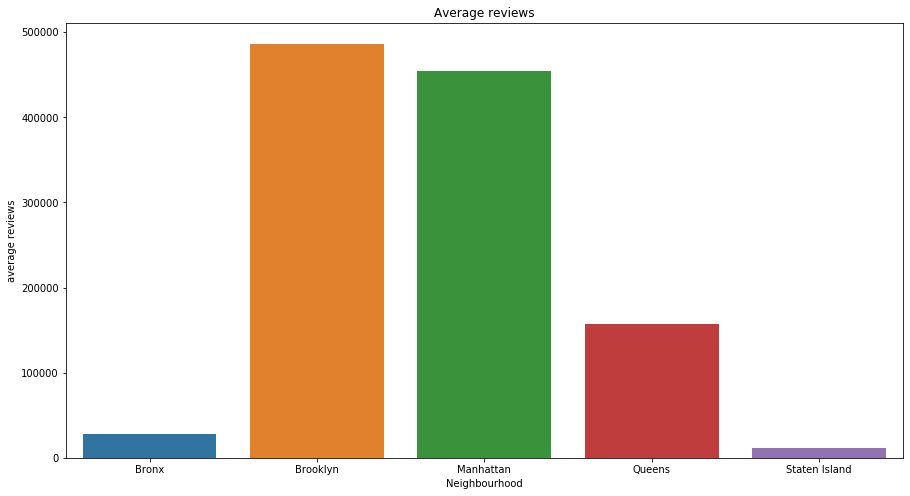

In [91]:
# let's plot a graph to see how people are satisfied with each cities
mean_price = data.groupby(['neighbourhood_group'])
price = mean_price.sum()['number_of_reviews']
df = pd.DataFrame(price)
df['neighbourhood_group'] = df.index
#df
plt.figure(figsize=(15,8))
reviews = sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=df)
plt.title('Average reviews')
plt.xlabel('Neighbourhood')
plt.ylabel('average reviews')


Text(0.5, 1.0, 'Count of listing by neighbourhood')

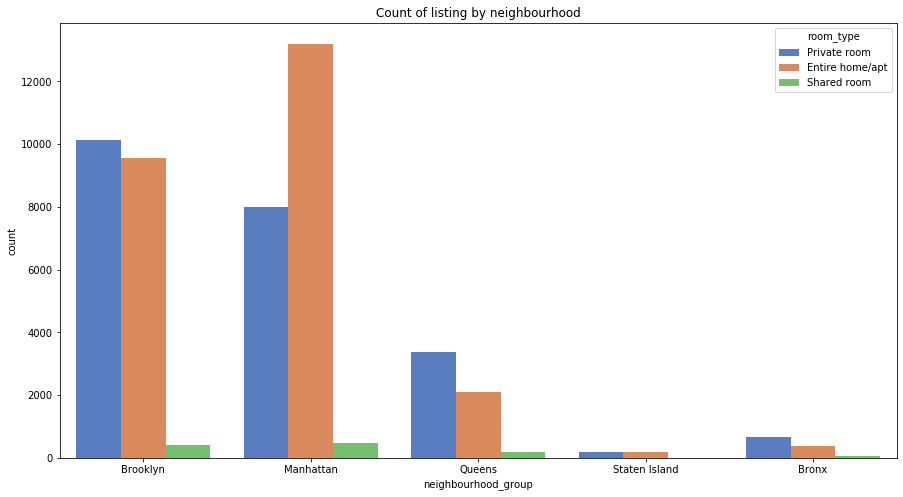

In [33]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x=data['neighbourhood_group'],hue=data['room_type'], palette='muted')
plt.title('Count of listing by neighbourhood')


In [34]:
# this grap above shows something interesting that the most wanted cities are brooklyn , Manhattan , and queens 
# and 

In [96]:
pivot_table = data.pivot_table(values=['price','minimum_nights','number_of_reviews'], index=['neighbourhood_group','room_type'],
                              aggfunc='mean')
pivot_table

minimum_nights  number_of_reviews  \
neighbourhood_group room_type                                            
Bronx               Entire home/apt        5.957784          30.678100   
                    Private room           3.858896          25.018405   
                    Shared room            3.366667           7.200000   
Brooklyn            Entire home/apt        6.531332          27.945183   
                    Private room           5.539479          21.086952   
                    Shared room            7.753027          14.026634   
Manhattan           Entire home/apt       10.539283          17.815516   
                    Private room           5.446880          26.202706   
                    Shared room            6.766667          21.400000   
Queens              Entire home/apt        5.369752          28.933206   
                    Private room           5.120107          27.746441   
                    Shared room            4.232323          13.863636   
Staten Island       Entire home/apt        6.238636          33.278409   
                    Private room           3.632979          30.159574   
                    Shared room            2.333333           1.555556   

                                          price  
neighbourhood_group room_type                    
Bronx               Entire home/apt  127.506596  
                    Private room      66.788344  
                    Shared room       59.800000  
Brooklyn            Entire home/apt  178.327545  
                    Private room      76.500099  
                    Shared room       50.527845  
Manhattan           Entire home/apt  249.239109  
                    Private room     116.776622  
                    Shared room       88.977083  
Queens              Entire home/apt  147.050573  
                    Private room      71.762456  
                    Shared room       69.020202  
Staten Island       Entire home/apt  173.846591  
                    Private room      62.292553  
                    Shared room       57.444444

In [36]:
#x = data.groupby(['room_type'])
x = data["room_type"].value_counts()
y = pd.DataFrame(x).reset_index()
y_rename = y.rename(columns={"index":"room",
                            "room_type": "count"})
y_rename
y_rename['percentage'] = round((y_rename['count'] / 48895)*100,2)
y_rename

,room,count,percentage
0,Entire home/apt,25409,51.97
1,Private room,22326,45.66
2,Shared room,1160,2.37


In [37]:
# with the analysis above we can conclude that 51.97% of airbnb in nyc they get entire room which is more than half
# so looking at this above, manhattan is the most expensive one and with most of entire_room. 

In [38]:
data['host_name'].nunique()

11453

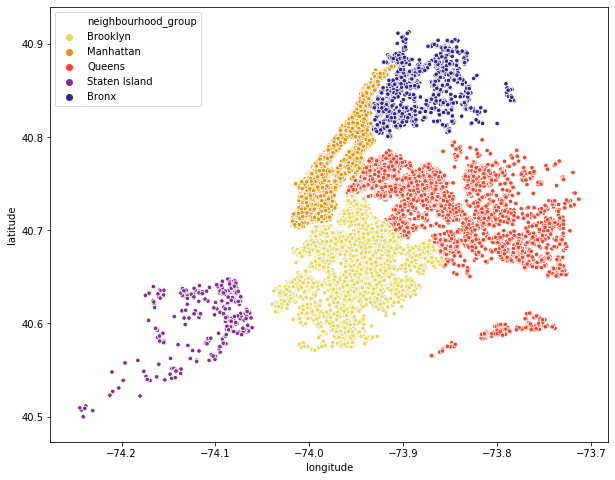

In [39]:
# map the distribution of per neighborhood using seaborn
plt.figure(figsize=(10,8))

sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=data, palette='CMRmap_r', s=20)
           

Text(0.5, 1.0, 'NEIGHBOURHOOD LISTINGS IN NYC')

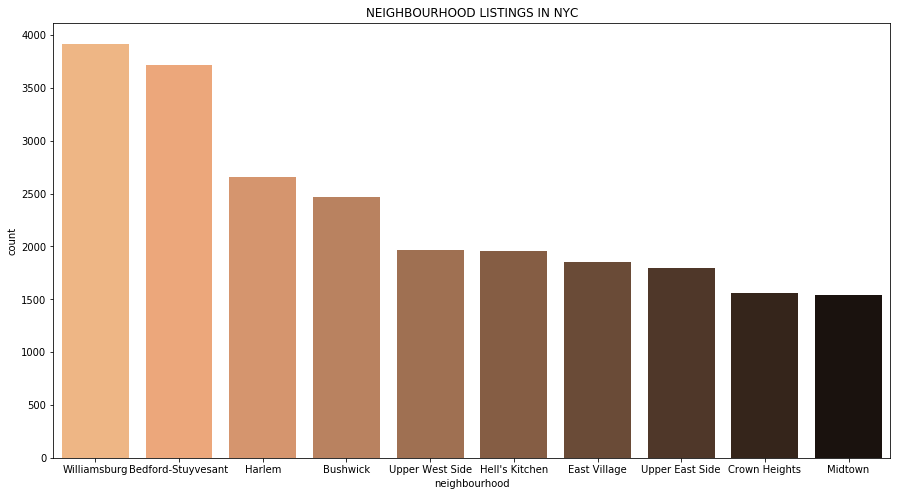

In [50]:
# i am trying now to count the most popular neighbourhood since so far we have been focusing on neighborhood_grp
plt.figure(figsize=(15,8))
sns.countplot(data.sort_values('neighbourhood').neighbourhood, order=data['neighbourhood'].value_counts().iloc[:10].index
             ,palette='copper_r')
plt.title("NEIGHBOURHOOD LISTINGS IN NYC")

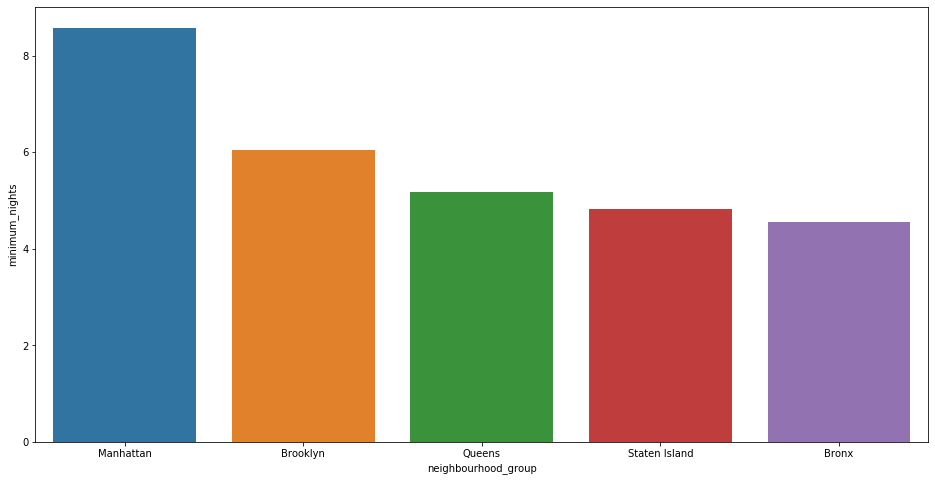

In [52]:
#most of the people go st brooklyn. 
# let's find the minimum nights per neighborhood
df_night = airbnb.groupby("neighbourhood_group").agg({"minimum_nights":"mean"}).sort_values("minimum_nights", ascending=False).reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x="neighbourhood_group", y="minimum_nights", data=df_night)
plt.show()

In [42]:
# check price distribution
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Airbnb location')

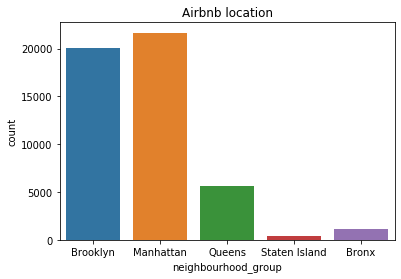

In [43]:
sns.countplot(data['neighbourhood_group'])
plt.title('Airbnb location')
# with this code above we are able to count the neighboord and we clearly see manhattan and brooklyn have  the most visitors 
    

# price distribution

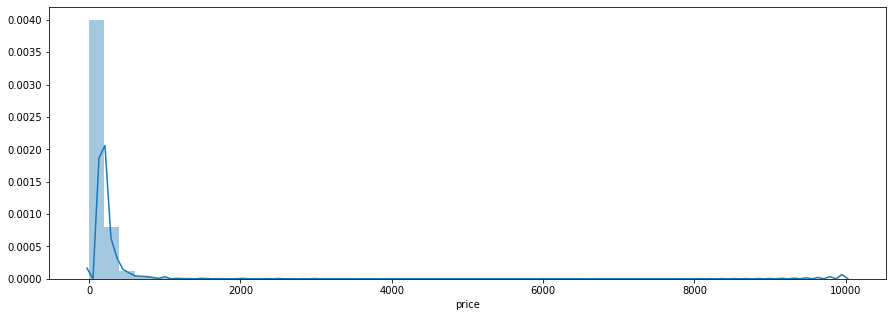

In [69]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(data.price)
plt.show()

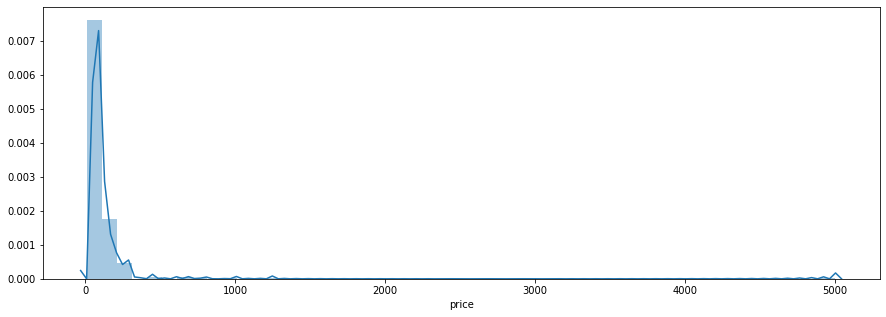

In [78]:
df1 = data[data.neighbourhood_group=='Staten Island']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

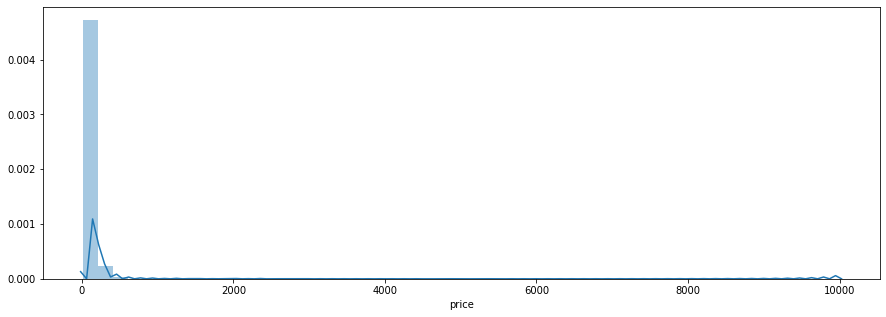

In [79]:
df1 = data[data.neighbourhood_group=='Queens']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

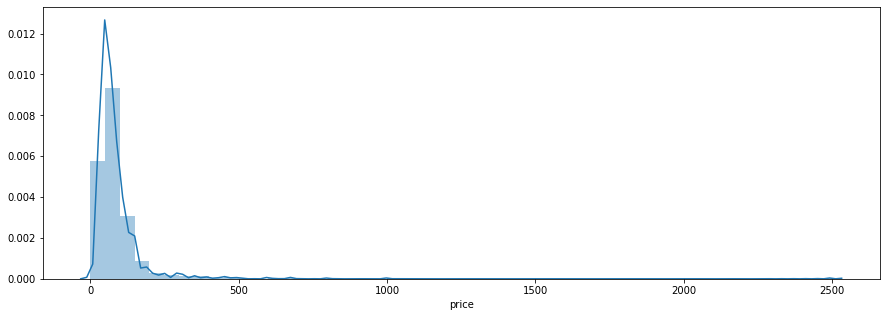

In [80]:
df1 = data[data.neighbourhood_group=='Bronx']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

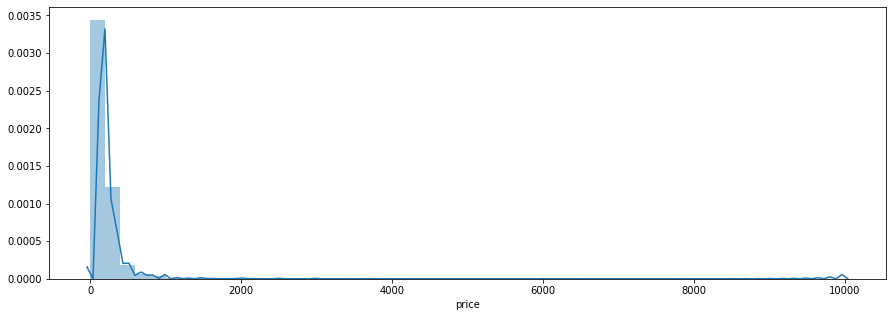

In [81]:
df1 = data[data.neighbourhood_group=='Manhattan']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

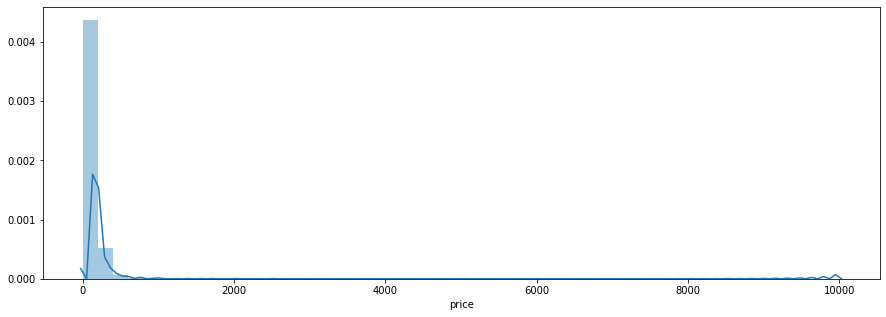

In [82]:
df1 = data[data.neighbourhood_group=='Brooklyn']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()